# D. Journic's Phase 2 Project

My first attempt at a notebook started to look more and more like a trainwreck made of nightmares. This is where I will clean it up and make it presentable.

## The Business Problem:
Given a certain housing dataset, form a nice linear model from the variables you desire. In this case, I want to make a kind of CarFax for houses: where a potential buyer can input the square footage in the house, and in the lot, the number of bedrooms and the number of bathrooms and my model will give them a price (hopefully a fair one).
The reason I chose these and not others was from a brief survey I conducted on my own neighbors, these were the four items they mentioned that were in the data; there were others (proximity to schools, restaurants, etc) but these were the criteria that was included in the data given.

Now that we have some idea what we want to do, let's get to it. Start by importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
# Setting random seed for reproducibility, not sure if I'll need it.
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import eli5

In [2]:
#Next, read the data
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
#The target variable is price.
price=df['price']

I know the variables I want to use for my data, so I can get rid of all the others.

In [6]:
col_ign=['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','floors','waterfront','condition','grade','yr_built']

In [7]:
df_s1=df.drop(columns=col_ign,axis=1)

### Ok, so now let's split the data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_s1, price)

In [9]:
len(X_test) + len(X_train) == len(df)

True

In [10]:
X_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot
10340,465000.0,4,2.50,2300,7314
20798,312000.0,3,2.50,1780,4077
16032,780000.0,3,2.00,2610,6000
1205,651000.0,3,2.00,1940,6440
13003,460000.0,3,2.25,1620,7350
...,...,...,...,...,...
6644,384900.0,5,2.50,3090,12750
1615,370000.0,3,2.75,1250,1655
14485,479000.0,3,2.50,1710,8998
9709,638000.0,3,2.50,2110,3600


In [11]:
X_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot
9399,440000.0,4,2.00,2310,5004
1213,455000.0,3,2.50,2090,8653
3273,456500.0,3,2.25,2090,9163
18001,630000.0,4,2.50,2190,9880
7601,715000.0,4,1.75,3420,7200
...,...,...,...,...,...
15611,249950.0,5,2.00,1730,7375
3776,522000.0,3,1.75,1630,15600
6215,253000.0,4,2.00,1910,7826
4695,1200000.0,4,4.00,4050,9517


In [12]:
price=df_s1['price'] #updating the target variable

In [13]:
X_test.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,5.443574e+05,3.376296,2.121111,2080.087963,15026.100741
std,3.785525e+05,0.988109,0.772324,905.010649,38591.546599
min,1.000000e+05,1.000000,0.500000,390.000000,638.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5080.000000
50%,4.500000e+05,3.000000,2.250000,1930.000000,7666.000000
75%,6.500000e+05,4.000000,2.500000,2560.000000,10800.000000
max,5.300000e+06,33.000000,7.500000,8670.000000,920423.000000


Let's take a look at the relationships between them

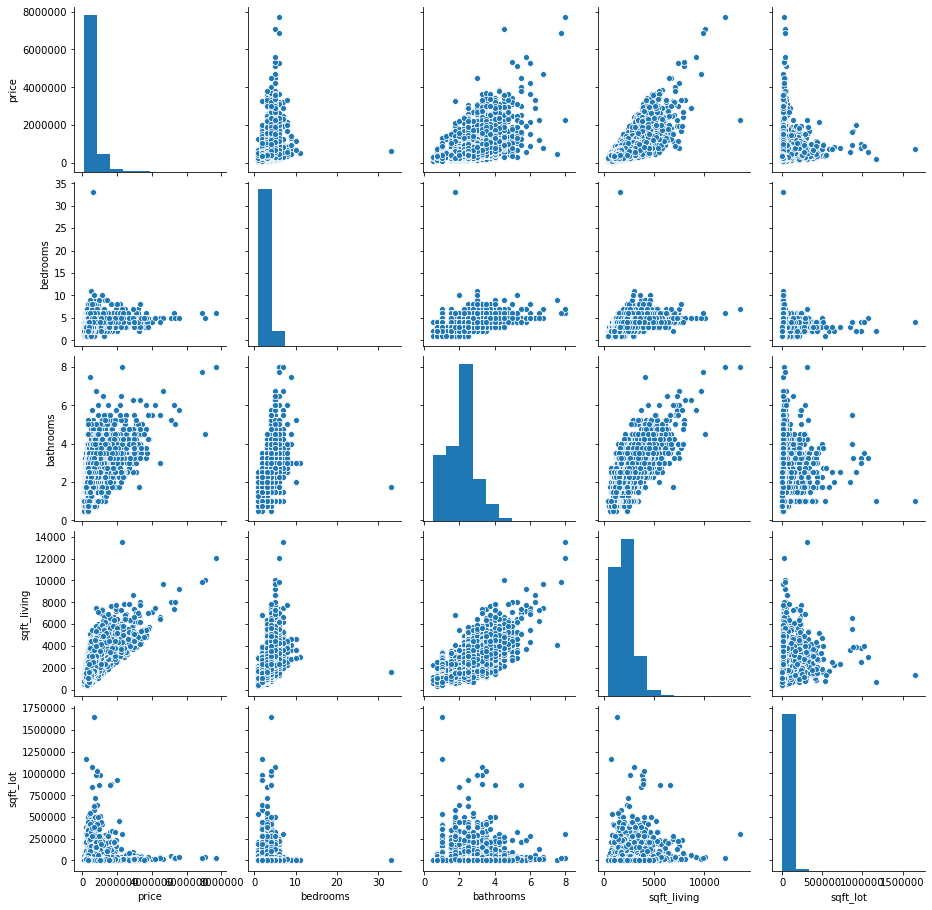

In [14]:
sns.pairplot(df_s1)

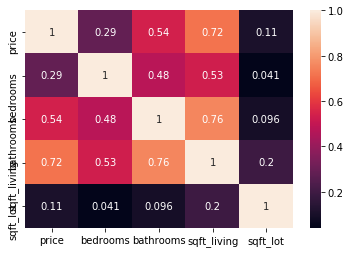

In [15]:
ax = sns.heatmap(X_test.corr(), annot=True)

ax.set_ylim(5,0)
plt.show()

So I noticed 1 particular outlier, in the bedrooms. One of the entries has 33 bedrooms. That will seriously mess up any model I create, so I'm dropping it.

In [16]:
df_s2 = X_test[X_test.bedrooms != 33]

So, this being a linear regression project, I see myself doing many linear regressions. To avoid repetitive code, I'll write a function.

In [17]:
def lreg (elements,target):
    """This function is designed to take in 2 dataframes: the elements and the target. It will then perform a linear
    regression of the variables, and print out the values of the slope (m), intercept (b), as well as the R2 score. It will also
    return those three variables.
    """
    lr=LinearRegression()
    X=elements.values
    y=target.values
    lr.fit(X,y)
    m = lr.coef_
    print('Slope: {}'.format(m))
    b = lr.intercept_
    print('Intercept: {}'.format(b))
    preds = lr.predict(X)
    r2 = r2_score(y, preds)
    print('R2 score: {}'.format(r2))
    
    return m,b,r2

Let's run it through a simple test:

In [18]:
lreg(df_s2[['sqft_living']],df_s2['price'])

Slope: [299.83705314]
Intercept: -79373.29217785597
R2 score: 0.513818905923906


(array([299.83705314]), -79373.29217785597, 0.513818905923906)

Success. So let's look at a model of the 4 variables I had picked earlier.

In [19]:
att1=['sqft_living','sqft_lot','bedrooms','bathrooms']

In [20]:
price=df_s2['price'] #Updating the target, again

In [21]:
lreg(df_s2[att1],price)

Slope: [ 3.37284135e+02 -4.36983082e-01 -7.17836914e+04  1.27337768e+04]
Intercept: 64255.68575776438
R2 score: 0.5335506955625227


(array([ 3.37284135e+02, -4.36983082e-01, -7.17836914e+04,  1.27337768e+04]),
 64255.68575776438,
 0.5335506955625227)

Now let's look at some things we can try to improve that R2 number. We saw from the pairplot that there isn't a very good distribution of the price. Let's look at it again, and see what we can do.

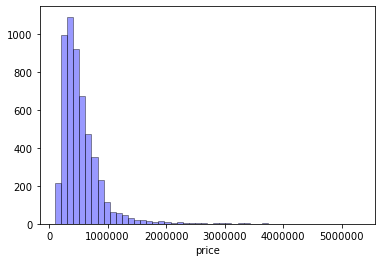

In [22]:
sns.distplot(df_s2['price'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

Let's try a simple log transform:

In [23]:
price_log=np.log(price)

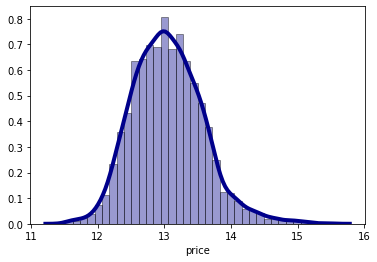

In [24]:
sns.distplot(price_log, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Another thing that can be done: cut off the price a bit. We can set the max to be 2 standard deviations from the log mean. This way only the extremely expensive houses will be cut out.

In [25]:
price_log.describe()

count    5399.000000
mean       13.052339
std         0.529492
min        11.512925
25%        12.679196
50%        13.017003
75%        13.384728
max        15.483217
Name: price, dtype: float64

In [26]:
price_log

10340    13.049793
20798    12.650758
16032    13.567049
1205     13.386265
13003    13.038982
           ...    
6644     12.860739
1615     12.821258
14485    13.079456
9709     13.366094
19326    13.473020
Name: price, Length: 5399, dtype: float64

In [27]:
stdv=0.526562
cutoff=price_log.mean() + (stdv*2)
price_top=np.exp(cutoff)
print(price_top)

1336364.3705687555


The cutoff is 1.33 Million, that seems like a good top.

In [28]:
df_low1=df_s2[df_s2.price<=1336364]

In [29]:
df_low1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
10340,465000.0,4,2.50,2300,7314
20798,312000.0,3,2.50,1780,4077
16032,780000.0,3,2.00,2610,6000
1205,651000.0,3,2.00,1940,6440
13003,460000.0,3,2.25,1620,7350


In [30]:
price=df_low1['price'] #updating the target variable

Let's try our first model again, but with the revised price data. I don't expect much of a change if any.

In [31]:
lreg(df_low1[att1],price)

Slope: [ 2.07992508e+02 -1.88731053e-01 -3.05808883e+04  1.13804240e+04]
Intercept: 159009.78751654836
R2 score: 0.4366657315632039


(array([ 2.07992508e+02, -1.88731053e-01, -3.05808883e+04,  1.13804240e+04]),
 159009.78751654836,
 0.4366657315632039)

So it got worse. Let's look at the distributions of my other variables, see if something can be done.

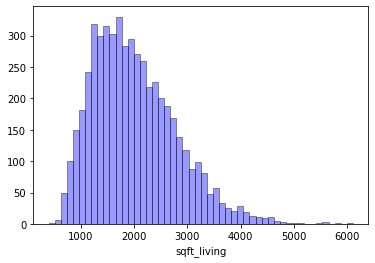

In [32]:
sns.distplot(df_low1['sqft_living'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

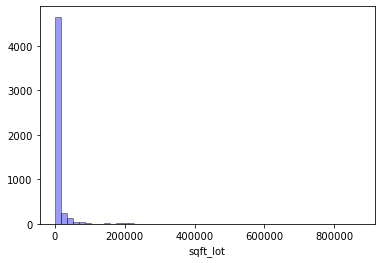

In [33]:
sns.distplot(df_low1['sqft_lot'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

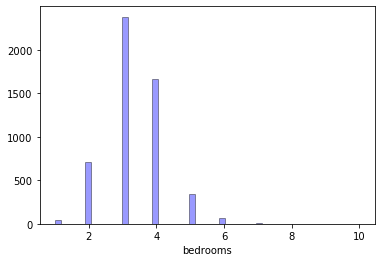

In [34]:
sns.distplot(df_low1['bedrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

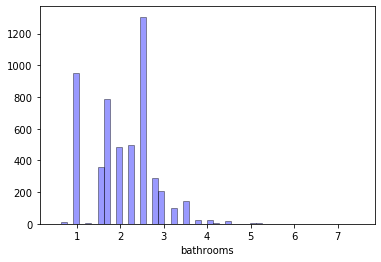

In [35]:
sns.distplot(df_low1['bathrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

Sqft_iving and sqft_lot could probably use a log transform. Bedrooms actually, kind of looks normal, bathrooms is an absolute mess. Since we're doing some more log transforms, I'm going to add the price_log to the dataframe.

In [36]:
continuous = ['sqft_living', 'sqft_lot','price']
cont = df_low1[continuous]
log_names = [f'{column}_log' for column in cont.columns]
df_log = np.log(cont)
df_log.columns = log_names

In [37]:
df_log

,sqft_living_log,sqft_lot_log,price_log
10340,7.740664,8.897546,13.049793
20798,7.484369,8.313117,12.650758
16032,7.867106,8.699515,13.567049
1205,7.570443,8.770284,13.386265
13003,7.390181,8.902456,13.038982
...,...,...,...
6644,8.035926,9.453287,12.860739
1615,7.130899,7.411556,12.821258
14485,7.444249,9.104758,13.079456
9709,7.654443,8.188689,13.366094


In [38]:
scaler = StandardScaler()
df_log_norm = scaler.fit_transform(df_log)

In [39]:
df_log_norm = pd.DataFrame(df_log_norm, columns = df_log.columns)

In [40]:
df_pre = pd.concat([df_log_norm, df_low1], axis=1)
df_pre.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,0.539527,-0.083337,0.097814,221900.0,3.0,1.0,1180.0,5650.0
1,-0.103242,-0.735059,-0.759538,NaN,NaN,NaN,NaN,NaN
2,0.856632,-0.304170,1.209174,NaN,NaN,NaN,NaN,NaN
3,0.112626,-0.225252,0.820747,604000.0,4.0,3.0,1960.0,5000.0
4,-0.339456,-0.077862,0.074586,510000.0,3.0,2.0,1680.0,8080.0


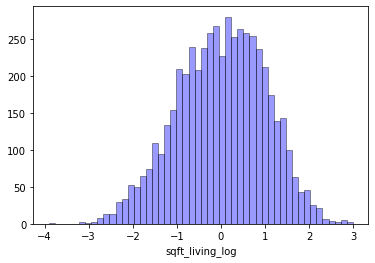

In [41]:
sns.distplot(df_pre['sqft_living_log'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [42]:
att3=['sqft_living_log','sqft_lot_log']

In [43]:
df_pre.dropna(inplace=True) #Getting rid of null values

In [44]:
lreg(df_pre[att1],df_pre['price_log'])

Slope: [-1.46823545e-05 -3.77005789e-07 -3.15829553e-02  5.32047795e-03]
Intercept: 0.13711029305086075
R2 score: 0.0014704578664385126


(array([-1.46823545e-05, -3.77005789e-07, -3.15829553e-02,  5.32047795e-03]),
 0.13711029305086075,
 0.0014704578664385126)

In [45]:
lreg(df_pre[att3],df_pre['price_log'])

Slope: [ 0.65211468 -0.11279797]
Intercept: -0.0002797681541454886
R2 score: 0.38185927776893147


(array([ 0.65211468, -0.11279797]),
 -0.0002797681541454886,
 0.38185927776893147)

In [46]:
att4=['sqft_living_log','sqft_lot_log','bedrooms','bathrooms']

In [47]:
lreg(df_pre[att4],df_pre['price_log'])

Slope: [ 0.65186048 -0.11296322 -0.02909912  0.01395427]
Intercept: 0.06943141795800946
R2 score: 0.3823998718422412


(array([ 0.65186048, -0.11296322, -0.02909912,  0.01395427]),
 0.06943141795800946,
 0.3823998718422412)

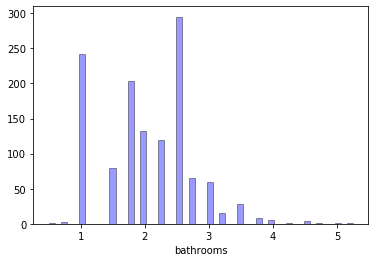

In [48]:
sns.distplot(df_pre['bathrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

What's a quarter of a bathroom look like? Or three quarters for that matter? I think I can simplify that some. Make the quarters into halves. I figure 2.25 bathrooms is closer to 2.5 than 2.0, but 3.75 bathrooms would also be closer to 3.4 than to 4. So I'll need to edit this column, more like add another column with just halves. I doubt this will help our model, but I don't think it can hurt.

In [49]:
list1=[1,5,9,13,17,21,25,29,33]
list2=[3,7,11,15,19,23,27,31,35]

If the number of bathrooms ends with .25 or .75, multiplying it by 4 (or dividing by .25) results in the numbers in the lists above. All that needs done is run through our dataframe, and change the value if necessary. If not, leave it alone.

In [50]:
df_pre['bath_haf']=df_pre['bathrooms'] #Create a new column for the changed results.

In [51]:
for i in df_pre.index:
    a= df_pre['bath_haf'][i]
    b= a/.25
    if b in list1:
        df_pre['bath_haf'][i]=a + 0.25
    elif b in list2:
        df_pre['bath_haf'][i]= a - 0.25
    else:
        df_pre['bath_haf'][i]= a

In [52]:
df_pre.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf
0,0.539527,-0.083337,0.097814,221900.0,3.0,1.0,1180.0,5650.0,1.0
3,0.112626,-0.225252,0.820747,604000.0,4.0,3.0,1960.0,5000.0,3.0
4,-0.339456,-0.077862,0.074586,510000.0,3.0,2.0,1680.0,8080.0,2.0
7,-0.189236,0.643871,0.022583,291850.0,3.0,1.5,1060.0,9711.0,1.5
8,1.738621,0.309211,0.468261,229500.0,3.0,1.0,1780.0,7470.0,1.0


In [53]:
df_pre['bath_haf'].unique()

array([1. , 3. , 2. , 1.5, 2.5, 3.5, 4. , 0.5, 4.5, 5. , 5.5])

This probably won't help, but nothing wrong with trying things out.

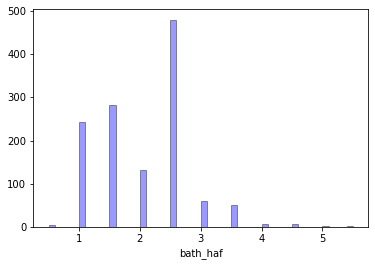

In [54]:
sns.distplot(df_pre['bath_haf'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

So let's try with this new bathroom data.

In [55]:
att5=['sqft_living_log','sqft_lot_log','bedrooms','bath_haf']

In [56]:
lreg(df_pre[att5],df_pre['price_log'])

Slope: [ 0.65178013 -0.11296468 -0.02833328  0.01220342]
Intercept: 0.07077135555575713
R2 score: 0.38238788874865515


(array([ 0.65178013, -0.11296468, -0.02833328,  0.01220342]),
 0.07077135555575713,
 0.38238788874865515)

Basically, no difference.

In [57]:
att6=['sqft_living','sqft_lot']

In [58]:
lreg(df_pre[att6],df_pre['price'])

Slope: [1.90614433e+02 5.21514104e-02]
Intercept: 108982.72870201612
R2 score: 0.4273311438290841


(array([1.90614433e+02, 5.21514104e-02]),
 108982.72870201612,
 0.4273311438290841)

Let's try a few more combinations, and see if they yield any better results.

In [59]:
att7=['bedrooms','bath_haf']
lreg(df_pre[att7],df_pre['price'])

Slope: [ 24078.289952   144854.74958086]
Intercept: 121044.89204285794
R2 score: 0.2506517033585842


(array([ 24078.289952  , 144854.74958086]),
 121044.89204285794,
 0.2506517033585842)

The challenge here is the beds and baths, making the data so it can better fit the model. There's something else I can try:

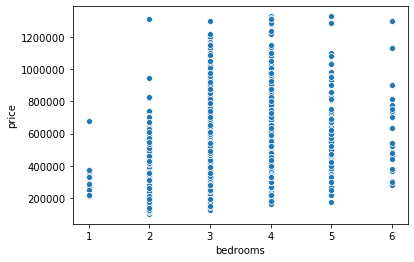

In [60]:
sns.scatterplot(data=df_pre, x="bedrooms", y="price")

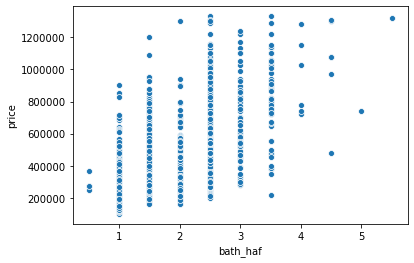

In [61]:
sns.scatterplot(data=df_pre, x="bath_haf", y="price")

In [62]:
df_pre = df_pre[df_pre.bathrooms <= 4]
df_pre = df_pre[df_pre.bedrooms <= 5]  #Setting a cap on the beds and baths

In [63]:
df_pre.groupby(['bedrooms','bath_haf']).size()

bedrooms  bath_haf
1.0       0.5           3
          1.0           7
          1.5           1
          2.5           1
2.0       0.5           1
          1.0          87
          1.5          35
          2.0          17
          2.5          17
          3.0           1
          3.5           1
3.0       1.0         125
          1.5         154
          2.0          63
          2.5         196
          3.0          12
          3.5          14
4.0       1.0          19
          1.5          82
          2.0          40
          2.5         226
          3.0          28
          3.5          23
          4.0           4
5.0       1.0           4
          1.5          10
          2.0           9
          2.5          29
          3.0          14
          3.5           9
          4.0           2
dtype: int64

The idea here is to take the top three values for each bed/bath combination, much like how we got rid of the quarter bathrooms.

In [64]:
df_pre['bath_3']=df_pre['bath_haf']

In [65]:
#This loop is going to evaluate each entry in the bath_3 and bedrooms column, and if the bathrooms do not fall into the top 3
# values (the group lists), it replaces the value with a null. Then a new dataframe is created without the null values.
for i in df_pre.index:
    group1=[.5,1.0,1.5]
    group23=[1,1.5,2.5]
    group4=[1.5,2,2.5]
    group5=[1.5,2.5,3.5]
    group6=[2.5,3,3.5]
    a= df_pre['bath_3'][i]
    b= df_pre['bedrooms'][i]
    if b == 2 and a not in group23:
        df_pre['bath_3'][i]= None
    elif b == 3 and a not in group23:
        df_pre['bath_3'][i]= None
    elif b == 4 and a not in group4:
        df_pre['bath_3'][i]= None
    elif b == 5 and a not in group5:
        df_pre['bath_3'][i]= None
    elif b == 6 and a not in group6:
        df_pre['bath_3'][i]= None 
    elif b == 1 and a not in group1:
        df_pre['bath_3'][i]= None
df_fin=df_pre.dropna()

In [66]:
df_fin.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,bath_3
0,0.539527,-0.083337,0.097814,221900.0,3.0,1.00,1180.0,5650.0,1.0,1.0
7,-0.189236,0.643871,0.022583,291850.0,3.0,1.50,1060.0,9711.0,1.5,1.5
8,1.738621,0.309211,0.468261,229500.0,3.0,1.00,1780.0,7470.0,1.0,1.0
26,-1.030167,-0.055333,-1.070181,937000.0,3.0,1.75,2450.0,2691.0,1.5,1.5
28,1.172226,-0.304170,0.762654,438000.0,3.0,1.75,1520.0,6380.0,1.5,1.5


In [67]:
df_fin.describe()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,bath_haf,bath_3
count,1021.000000,1021.000000,1021.000000,1.021000e+03,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.009467,-0.006227,-0.000643,4.718198e+05,3.277179,1.92238,1930.401567,14904.446621,1.885406,1.885406
std,0.953182,0.987207,0.958129,2.179064e+05,0.794934,0.61420,730.457702,32701.707592,0.641760,0.641760
min,-2.516553,-2.545515,-2.999469,1.000000e+05,1.000000,0.75000,520.000000,877.000000,0.500000,0.500000
25%,-0.669923,-0.493081,-0.672491,3.070000e+05,3.000000,1.50000,1360.000000,5349.000000,1.500000,1.500000
50%,0.020461,-0.040562,0.022583,4.250000e+05,3.000000,2.00000,1840.000000,7850.000000,2.000000,2.000000
75%,0.687718,0.363006,0.670389,6.040000e+05,4.000000,2.50000,2380.000000,10754.000000,2.500000,2.500000
max,2.989810,4.626985,2.355737,1.330000e+06,5.000000,3.75000,4930.000000,423838.000000,3.500000,3.500000


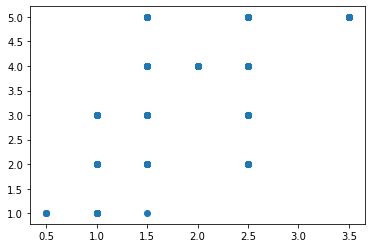

In [68]:
plt.scatter(df_fin['bath_3'],df_fin['bedrooms'])

In [69]:
att8=['bedrooms','bath_3']
lreg(df_fin[att8],df_fin['price'])

Slope: [ 25681.0901558  120591.70552213]
Intercept: 160293.85524837958
R2 score: 0.16949731520094358


(array([ 25681.0901558 , 120591.70552213]),
 160293.85524837958,
 0.16949731520094358)

In [70]:
att9=['bedrooms','bath_3','sqft_living_log','sqft_lot_log']
lreg(df_fin[att9],df_fin['price'])

Slope: [ 25124.92953334 120971.23908564 -12643.63027565    747.33499627]
Intercept: 161525.27052605
R2 score: 0.17245253157174711


(array([ 25124.92953334, 120971.23908564, -12643.63027565,    747.33499627]),
 161525.27052605,
 0.17245253157174711)

In [71]:
att10=['bedrooms','bath_3','sqft_living_log','sqft_lot_log']
lreg(df_fin[att9],df_fin['price_log'])

Slope: [-0.05210963 -0.007916    0.64681523 -0.11491623]
Intercept: 0.17821536592374856
R2 score: 0.38597251805463995


(array([-0.05210963, -0.007916  ,  0.64681523, -0.11491623]),
 0.17821536592374856,
 0.38597251805463995)

So the best R2 value I got from all these attempts was the very first one:

In [72]:
lreg(df_s2[att1],df_s2['price'])

Slope: [ 3.37284135e+02 -4.36983082e-01 -7.17836914e+04  1.27337768e+04]
Intercept: 64255.68575776438
R2 score: 0.5335506955625227


(array([ 3.37284135e+02, -4.36983082e-01, -7.17836914e+04,  1.27337768e+04]),
 64255.68575776438,
 0.5335506955625227)

Everything I've done to try to manipulate the data to better fit has only made it worse. There are other things to try, but that will have to wait for another time. So let's see how this works with the test data.

In [86]:
X=df_s1
y=df_s1['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [87]:
X_train=df_s2

In [88]:
y_train=df_s2['price']

In [89]:
len(X_test) + len(X_train) == len(df)

False

That's not unexpected, I've removed a number of entries to manipulate the data.

In [79]:
scaler = StandardScaler()

In [90]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
y_train

10340    465000.0
20798    312000.0
16032    780000.0
1205     651000.0
13003    460000.0
           ...   
6644     384900.0
1615     370000.0
14485    479000.0
9709     638000.0
19326    710000.0
Name: price, Length: 5399, dtype: float64

In [92]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")

print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")


Training Scores:
R2: 1.0
Testing Scores:
R2: 1.0


Again, these numbers do not inspire a lot of confidence in the model. But I think I've done just about as much as I can on manipulating the data. So I'll wrap this up by writing a little code to input those values, and see what comes out.

In [93]:
df_s1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06


In [95]:
X=df_s2[att1]
y=df_s2['price']

In [96]:
m,b,r2=lreg(X,y)

Slope: [ 3.37284135e+02 -4.36983082e-01 -7.17836914e+04  1.27337768e+04]
Intercept: 64255.68575776438
R2 score: 0.5335506955625227


In [286]:
liv_area= float(input("Enter interior square footage (1000-12000): "))

Enter interior square footage (1000-12000): 10000


In [287]:
acre= float(input("Enter lot area (550-1600000): "))

Enter lot area (550-1600000): 25000


In [288]:
nbeds= float(input("Enter number of bedrooms (1-7): "))

Enter number of bedrooms (1-7): 3


In [290]:
nbath= float(input("Enter number of bathrooms (1-8): "))

Enter number of bathrooms (1-8): 2


In [291]:
house= pd.DataFrame([[liv_area,acre,nbeds,nbath]],columns=['sqft_living','sqft_lot','bedrooms','bathrooms'])

In [292]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
sqft_living    1 non-null float64
sqft_lot       1 non-null float64
bedrooms       1 non-null float64
bathrooms      1 non-null float64
dtypes: float64(4)
memory usage: 160.0 bytes


In [293]:
d_price= m*house+b

In [294]:
d_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
sqft_living    1 non-null float64
sqft_lot       1 non-null float64
bedrooms       1 non-null float64
bathrooms      1 non-null float64
dtypes: float64(4)
memory usage: 160.0 bytes


In [295]:
est=sum(d_price.values)

In [296]:
est.tolist()

[3217080.1773294136, 90691.62173245277, -90368.59805341769, 109731.41829764677]

In [297]:
est1=sum(est)

In [298]:
print('Estimated price: {}'.format(est1))

Estimated price: 3327134.6193060954


So let's put all that into a nice function:

In [299]:
def estimate():
    """This function will allow the user to input 4 values (sqft_living, sqft_lot, bedrooms, and bathrooms) and will receive an
    estimated price based off the linear regression function (lreg) earlier in this program. This function will not operate if
    that function isn't already run with valid values for X and y."""
    m,b,r2=lreg(X,y)
    liv_area= float(input("Enter interior square footage (1000-12000): "))
    acre= float(input("Enter lot area (550-1600000): "))
    nbeds= float(input("Enter number of bedrooms (1-7): "))
    nbath= float(input("Enter number of bathrooms (1-8): "))
    house= pd.DataFrame([[liv_area,acre,nbeds,nbath]],columns=['sqft_living','sqft_lot','bedrooms','bathrooms'])
    d_price= m*house+b
    est=sum(d_price.values)
    est.tolist()
    est1=sum(est)
    print('Estimated price: ${}'.format(round(est1,2)))
    return None

In [300]:
estimate()

Slope: [ 3.11697741e+02 -3.76446004e-01 -6.34904566e+04  4.81432323e+03]
Intercept: 100102.77184105088
R2 score: 0.5029354066927232
Enter interior square footage (1000-12000): 12000
Enter lot area (550-1600000): 160000
Enter number of bedrooms (1-7): 7
Enter number of bathrooms (1-8): 8
Estimated price: $3674634.0


## Conclusion:
These models aren't very good. There just isn't a lot of correlation between some of these variables. There's a lot of work left to do, but I'm pretty confident I could make it work, if given enough time. 
### Some ideas to improve: 
Narrowing the scope by zip code, running models for a specific zip code, making that part of the input. I could also narrow the square footage variables a bit more (I noticed quite a range as I was writing the code for the estimator).